In [32]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
plt.style.use('bmh')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
from IPython.core.display import display, HTML
pylab.rcParams.update(params)
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_columns', None)

### Results on validation set:
Naive:<br>
MAE	MSE	RMSE	MAPE	AMAPE<br>
0.024457	0.001111	0.03333	1.285145	0.640219<br>

ExponentialSmoothing<br>
MAE	MSE	RMSE	MAPE	AMAPE<br>
0.033096	0.001741	0.041729	1.733818	0.863917<br>

SARIMA(1, 1, 0)	(0, 0, 0, 252):<br>
MAE	MSE	RMSE	MAPE	AMAPE<br>
0.024439	0.001105	0.033236	1.282628	0.638875<br>

SARIMA(0, 1, 0)	(0, 0, 0, 252):<br>
MAE	MSE	RMSE	MAPE	AMAPE<br>
0.024457	0.001111	0.03333	1.285145	0.640219<br>
--- oczywiście to samo co NaiveModel

SARIMA(1, 0, 0)	(0, 0, 0, 252):<br>
MAE	MSE	RMSE	MAPE	AMAPE<br>
0.024577	0.00111	0.033317	1.291034	0.643507<br>
    
SVR(kernel='linear', C=1.547544, epsilon=0.096128)<br>
MAE	MSE	RMSE	MAPE	AMAPE<br>
0.024577	0.0011	0.033162	1.29076	0.642659<br>

LSTM():<br>
MAE	MSE	RMSE	MAPE	AMAPE<br>
0.216675	0.059413	0.243748	12.254798	6.572638<br>

In [33]:
rmse_sarima = 0.033236
rmse_svr = 0.033162

In [34]:
w_sarima = rmse_sarima/(rmse_sarima+rmse_svr)
w_svr = rmse_svr/(rmse_sarima+rmse_svr)
print(w_sarima,w_svr)

0.5005572457001717 0.49944275429982826


In [35]:
df_svr = pd.read_csv("svr_yhat.csv",index_col=0)
df_svr = df_svr.add_prefix("svr_")

In [36]:
df_sarima = pd.read_csv("sarima_yhat.csv",index_col=0)
df_sarima = df_sarima.add_prefix("sarima_")

In [37]:
df = pd.merge(df_svr,df_sarima,left_index=True,right_index=True)

In [38]:
df["y_hat"] = (w_sarima*df.sarima_y_hat+w_svr*df.svr_y_hat)
df = df[["y_hat","svr_y"]]
df.columns = ["y_hat","y"]

In [39]:
from sklearn.metrics import *

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def adj_mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true+y_pred))) * 100

def metryczki(x,y):
    wyniki = pd.DataFrame()
    mae = mean_absolute_error(x,y)
    xd = list()
    xd.append(mae)
    mse = mean_squared_error(x,y)
    rmse = np.sqrt(mean_squared_error(x,y))
    mape = mean_absolute_percentage_error(x,y)
    amape = adj_mean_absolute_percentage_error(x,y)
    wyniki["MAE"]=xd
    wyniki["MSE"]=mse
    wyniki["RMSE"]=rmse
    wyniki["MAPE"]=mape
    wyniki["AMAPE"]=amape
    return wyniki

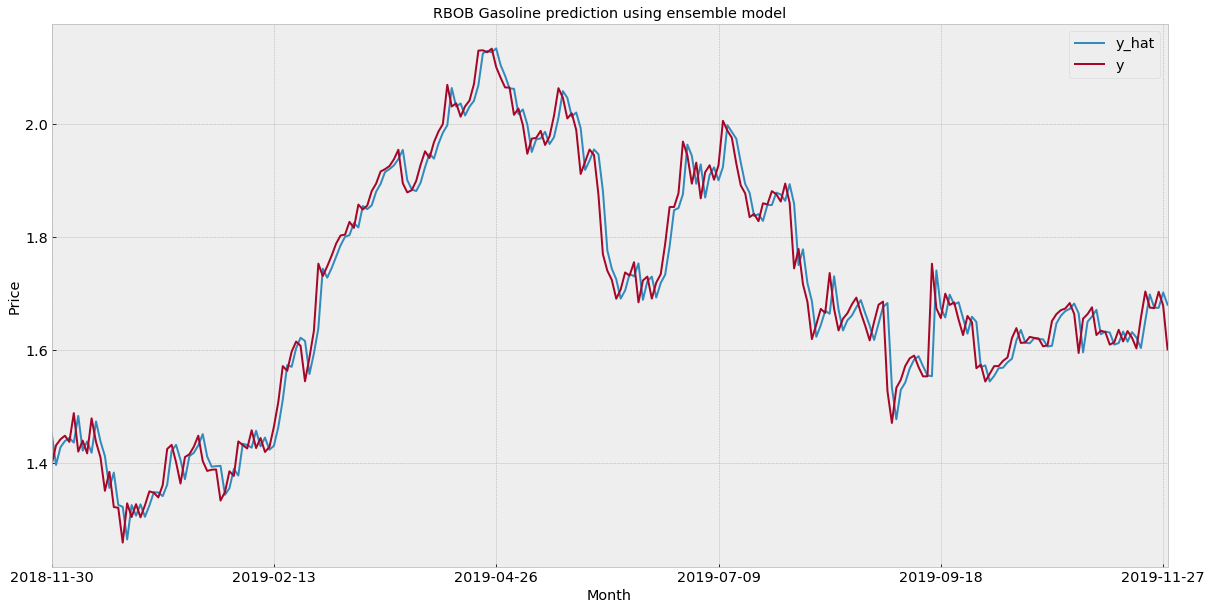

In [41]:
df.plot()
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("RBOB Gasoline prediction using ensemble model")
plt.savefig("fig10.png")

In [30]:
metryczki(df.y.values,df.y_hat.values)

,MAE,MSE,RMSE,MAPE,AMAPE
0,0.028758,0.001495,0.038662,1.724193,0.86139


In [31]:
df.to_csv("y_hat_final.csv")